In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

In [2]:
# loads and displays our summary statistics of our data
cp_df = pd.read_csv("clustering_pearson.csv")
cp_df.head()


,ID/Node,1,2,3,6,7,8,11,12,13,...,285,286,287,288,289,290,291,292,293,294
0,002_S_4229_2011-09-21_16_35_10,0.0173,0.0205,0.0214,0.0332,0.0154,0.0228,0.0200,0.0477,0.0436,...,0.0243,0.0229,0.0224,0.0191,0.0209,0.0249,0.0364,0.0196,0.0139,0.0149
1,002_S_4473_2012-02-10_08_17_15,0.0356,0.0359,0.0270,0.0187,0.0152,0.0245,0.0247,0.0301,0.0382,...,0.0252,0.0227,0.0185,0.0199,0.0386,0.0311,0.0335,0.0232,0.0148,0.0160
2,002_S_4521_2012-02-17_16_52_08,0.0424,0.0420,0.0214,0.0156,0.0197,0.0190,0.0177,0.0362,0.0411,...,0.0237,0.0281,0.0145,0.0159,0.0304,0.0364,0.0280,0.0257,0.0139,0.0156
3,002_S_4799_2012-06-21_16_25_41,0.0259,0.0210,0.0463,0.0292,0.0218,0.0221,0.0215,0.0391,0.0348,...,0.0176,0.0175,0.0178,0.0210,0.0312,0.0282,0.0567,0.0224,0.0234,0.0206
4,002_S_6695_2019-03-14_07_51_57,0.0291,0.0345,0.0365,0.0261,0.0255,0.0313,0.0196,0.0231,0.0300,...,0.0145,0.0180,0.0191,0.0238,0.0128,0.0377,0.0230,0.0268,0.0264,0.0234


In [3]:
cp_df.columns = cp_df.columns.str.replace('Unnamed:','')
cp_df = cp_df.drop(cp_df.index[[108,109,110]])
cp_df = cp_df.drop(cp_df.columns[[0]],axis=1)
cp_df.shape

(216, 276)

In [4]:
x=cp_df.values
x = StandardScaler().fit_transform(x)


In [5]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
print(principalDf)

     principal component 1  principal component 2  principal component 3
0                11.912715              -1.514642               0.770150
1                 5.473719              -2.974952              -0.460607
2                 5.195183              -3.738931               0.761520
3                10.351153               1.573079               0.383993
4                 4.830534              -1.925386              -1.027785
..                     ...                    ...                    ...
211              -1.787729               5.793967              -9.766819
212             -11.063022              -1.422298              -5.246830
213              -8.588896               0.032485               0.822276
214              -4.645866               1.762777              -2.111278
215               1.355100               9.631256              -8.170362

[216 rows x 3 columns]


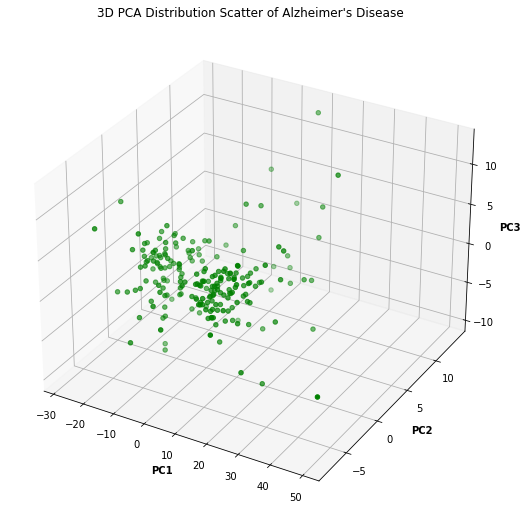

In [6]:
#Creat 3D PCA Distribution

x = principalDf['principal component 1']
y = principalDf['principal component 2']
z = principalDf['principal component 3']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, z, color = "green")
 
plt.title("3D PCA Distribution Scatter of Alzheimer's Disease")
ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold')
ax.set_zlabel('PC3', fontweight ='bold')

 
# show plot
plt.show()

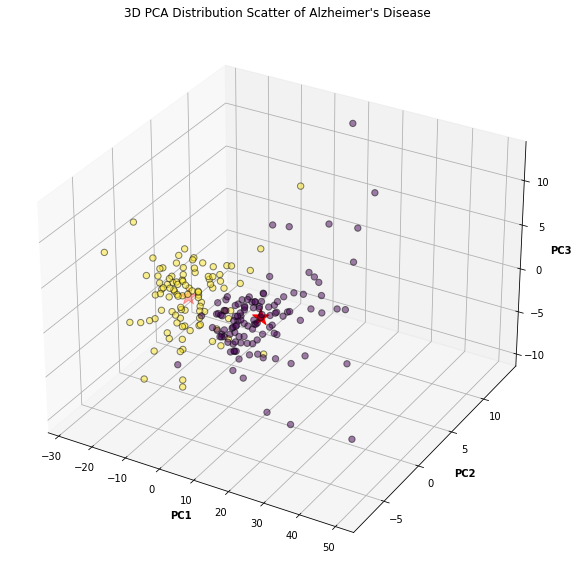

Inertia: 12962.8086013982


In [32]:
#Creat 3D PCA Distribution in two clusters with centroids
cp_kmeans = KMeans(n_clusters=2, random_state=109).fit(principalDf)

y_kmeans_PCA = cp_kmeans.fit_predict(principalComponents)
y_kmeans_PCA

# Creating figure
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalComponents[:,0],
           principalComponents[:,1],
           principalComponents[:,2],
           
            c=y_kmeans_PCA, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)

plt.title("3D PCA Distribution Scatter of Alzheimer's Disease ")
ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold')
ax.set_zlabel('PC3', fontweight ='bold')

ax.scatter(cp_kmeans.cluster_centers_[:,0], 
           cp_kmeans.cluster_centers_[:,1], 
           cp_kmeans.cluster_centers_[:,2], 
           s = 300, c = 'r', marker='*', label = 'Centroid')

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()

inertia = cp_kmeans.inertia_
print("Inertia:",inertia)


In [25]:
#When there are three clusters

cp_kmeans = KMeans(n_clusters=2, random_state=109).fit(principalDf)

display(cp_kmeans.cluster_centers_)
display(cp_kmeans.labels_[0:10])


inertia = cp_kmeans.inertia_
inertia


array([[ 10.04223172,  -0.13713578,   0.17151679],
       [-11.86809204,   0.16206956,  -0.20270167]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

12962.8086013982

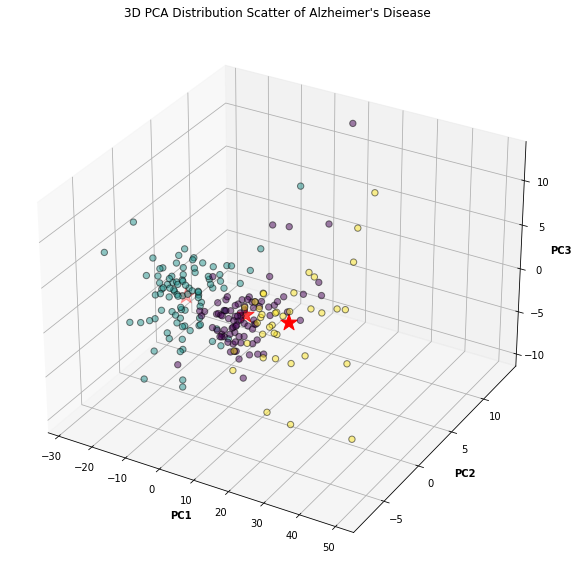

Inertia: 9417.239696858625


In [27]:
#Creat 3D PCA Distribution in three clusters with centroids
cp_kmeans = KMeans(n_clusters=3, random_state=109).fit(principalDf)

y_kmeans_PCA = cp_kmeans.fit_predict(principalComponents)
y_kmeans_PCA

# Creating figure
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalComponents[:,0],
           principalComponents[:,1],
           principalComponents[:,2],
           
            c=y_kmeans_PCA, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)

plt.title("3D PCA Distribution Scatter of Alzheimer's Disease ")
ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold')
ax.set_zlabel('PC3', fontweight ='bold')

ax.scatter(cp_kmeans.cluster_centers_[:,0], 
           cp_kmeans.cluster_centers_[:,1], 
           cp_kmeans.cluster_centers_[:,2], 
           s = 300, c = 'r', marker='*', label = 'Centroid')

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()

inertia = cp_kmeans.inertia_
print("Inertia:",inertia)

In [28]:
#When there are three clusters

cp_kmeans = KMeans(n_clusters=3, random_state=109).fit(principalDf)

display(cp_kmeans.cluster_centers_)
display(cp_kmeans.labels_[0:10])


inertia = cp_kmeans.inertia_
inertia


array([[ 5.71661770e+00, -1.72864011e-01, -1.09224408e-02],
       [-1.24884663e+01,  1.39514297e-01, -1.31103545e-01],
       [ 1.77767069e+01,  4.52266127e-02,  3.45290451e-01]])

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

9417.239696858625

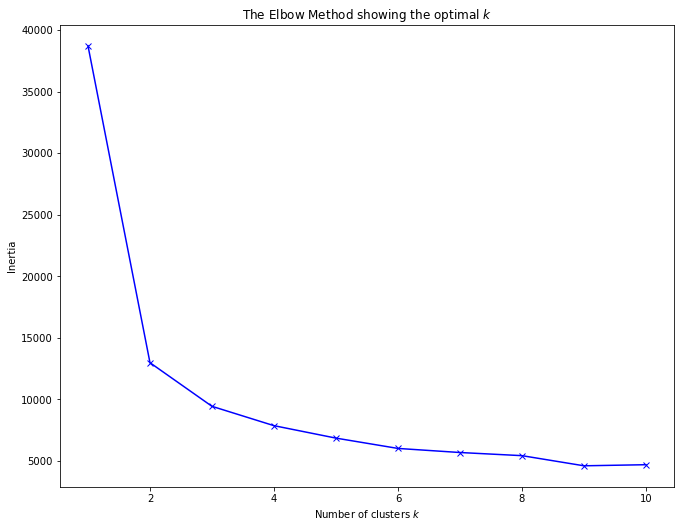

In [30]:
wss = []
for i in range(1,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(principalDf)
    wss.append(fitx.inertia_)

plt.figure(figsize=(11,8.5))
plt.plot(range(1,11), wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

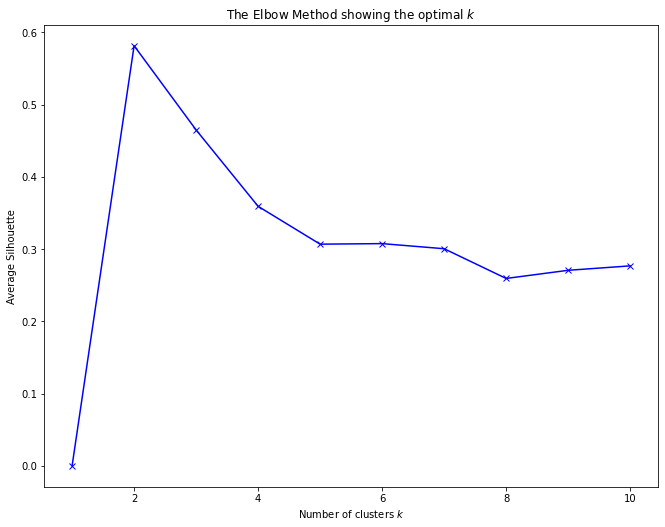

In [29]:
from sklearn.metrics import silhouette_score

scores = [0]
for i in range(2,11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(principalDf)
    score = silhouette_score(principalDf, fitx.labels_)
    scores.append(score)
    
plt.figure(figsize=(11,8.5))
plt.plot(range(1,11), np.array(scores), 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [ ]:
num_components = 2

x = StandardScaler().fit_transform(x)
# scale the datasets
scale_transformer = StandardScaler(copy=True).fit(x_train)
x_train_scaled = scale_transformer.transform(x_train)
x_test_scaled = scale_transformer.transform(x_test)

# reduce dimensions
svd_transformer = TruncatedSVD(num_components).fit(x_train_scaled)
x_train_2d = svd_transformer.transform(x_train_scaled)
x_test_2d =  svd_transformer.transform(x_test_scaled)

print(x_train_2d.shape)
x_train_2d[0:5,:]

In [ ]:
var_explained = svd_transformer.explained_variance_ratio_
print("Variance explained by each SVD component:", var_explained)
print("Total Variance Explained:", np.sum(var_explained))